# Property Price Prediction using Linear Regression OLS Method
## Abstract:
    A key challenge for property sellers is to determine the sale price of the property. The 
    ability to predict the exact property value is beneficial for property investors as well as 
    for buyers to plan their finances according to the price trend. The property prices 
    depend on the number of features like the property area, basement square footage, year 
    built, number of bedrooms, and so on.
## Problem Statement:
    Use regression analysis to predict the price of a property

## Importing Necessary Libraries

In [32]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

## Setting pandas options for convinient display

In [33]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
np.set_printoptions(suppress=False)

## Importing and Reading the Data

In [34]:
df=pd.read_csv('HousePrices.csv')
df.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [35]:
df.shape

(2073, 81)

# EDA

C:\Users\Saran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Sale Price')

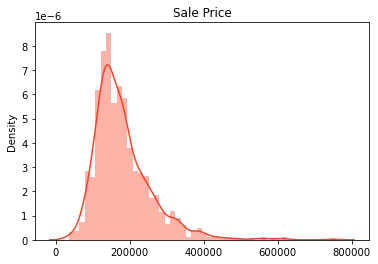

In [36]:
sns.distplot(a=df['Property_Sale_Price'],color='#ff4125',axlabel=False).set_title('Sale Price')

The sale price is rightward skewed

In [37]:
df.corr()

,Id,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
Id,1.000000,0.043264,0.066902,0.004201,0.083367,0.195635,-0.080204,0.087397,-0.027147,-0.016424,0.004953,-0.007132,-0.022610,0.007956,0.002781,-0.023803,0.005877,0.021117,-0.030925,0.023712,0.000216,0.011009,0.007471,0.009598,-0.010996,0.075043,0.028359,0.016845,0.006044,-0.004948,0.001317,-0.045446,-0.004690,0.031303,-0.007318,0.000234,0.043219,-0.002491
Dwell_Type,0.043264,1.000000,-0.075636,-0.033609,0.046278,0.033023,0.027194,0.042864,-0.004832,-0.034072,-0.025699,-0.022296,-0.068557,-0.078372,0.101374,0.004985,0.029368,-0.016284,-0.004521,0.056762,0.066188,-0.005343,0.074835,0.019444,-0.031639,0.044238,-0.001193,-0.013785,0.004620,0.002153,-0.006529,-0.011966,-0.012021,0.001625,-0.003942,-0.020589,0.018891,-0.017399
LotFrontage,0.066902,-0.075636,1.000000,0.311156,0.108095,-0.011213,0.092680,0.101034,0.129620,0.139424,0.062472,0.112684,0.284690,0.357239,0.070194,0.023235,0.320638,0.087222,-0.037956,0.176271,0.048311,0.228194,0.006560,0.294922,0.226642,0.067647,0.233973,0.269121,0.082081,0.106846,-0.002309,0.042993,0.021500,0.124087,-0.005094,0.025110,0.025584,0.279836
LotArea,0.004201,-0.033609,0.311156,1.000000,0.078232,0.014209,-0.010551,0.017766,0.064370,0.164989,0.075875,0.000127,0.200794,0.244940,0.036583,-0.001199,0.209442,0.126283,0.031688,0.097835,0.003932,0.107307,-0.008350,0.155519,0.211193,-0.022035,0.128792,0.144898,0.121530,0.064376,-0.023199,0.010594,0.035370,0.062458,0.030949,-0.001707,-0.006478,0.211572
OverallQual,0.083367,0.046278,0.108095,0.078232,1.000000,-0.010092,0.335326,0.379579,0.283981,0.163501,-0.058146,0.197844,0.354046,0.308402,0.209623,-0.013395,0.401340,0.084128,-0.047402,0.382428,0.190106,0.059223,-0.111588,0.272410,0.255236,0.381405,0.399407,0.373203,0.155307,0.217044,-0.080219,0.000451,0.021561,0.045138,-0.034206,0.033685,-0.021130,0.523553
OverallCond,0.195635,0.033023,-0.011213,0.014209,-0.010092,1.000000,-0.245303,0.084102,-0.083282,-0.035849,0.027023,-0.098924,-0.130098,-0.087931,0.013921,-0.009863,-0.053220,-0.029309,0.048357,-0.116006,-0.040809,-0.010460,-0.019415,-0.034231,-0.031404,-0.147551,-0.113676,-0.084758,0.013854,-0.042208,0.044501,0.017358,0.012021,-0.016993,0.041833,-0.025281,0.035050,-0.049926
YearBuilt,-0.080204,0.027194,0.092680,-0.010551,0.335326,-0.245303,1.000000,0.536129,0.263968,0.207941,-0.027220,0.118779,0.329629,0.235759,0.014821,-0.180458,0.167113,0.141150,-0.017865,0.399802,0.194491,-0.057069,-0.143619,0.080751,0.135165,0.721961,0.456665,0.406962,0.180472,0.179935,-0.322195,0.034056,-0.049156,0.005788,-0.038620,0.027765,-0.006211,0.437662
YearRemodAdd,0.087397,0.042864,0.101034,0.017766,0.379579,0.084102,0.536129,1.000000,0.166549,0.101401,-0.073927,0.198201,0.283802,0.224185,0.136079,-0.085126,0.270691,0.101714,-0.012083,0.422568,0.180755,-0.037185,-0.128308,0.173802,0.106243,0.647469,0.393252,0.336030,0.182932,0.221604,-0.177739,0.039945,-0.036832,-0.009607,-0.011749,0.033514,0.058932,0.475565
MasVnrArea,-0.027147,-0.004832,0.129620,0.064370,0.283981,-0.083282,0.263968,0.166549,1.000000,0.238535,-0.079737,0.124202,0.346359,0.321517,0.191169,-0.071056,0.388811,0.075338,0.026707,0.281699,0.204664,0.102271,-0.054222,0.275450,0.276028,0.241176,0.356654,0.361222,0.123340,0.141377,-0.097651,0.029774,0.063607,0.002936,-0.035352,-0.017798,0.020028,0.482038
BsmtFinSF1,-0.016424,-0.034072,0.139424,0.164989,0.163501,-0.035849,0.207941,0.101401,0.238535,1.000000,-0.060739,-0.508612,0.485476,0.399249,-0.127193,-0.071539,0.176213,0.638649,0.079832,0.040933,0.014429,-0.130357,-0.090372,0.010932,0.220218,0.139292,0.195292,0.258896,0.207229,0.107593,-0.089326,0.0450

<AxesSubplot:>

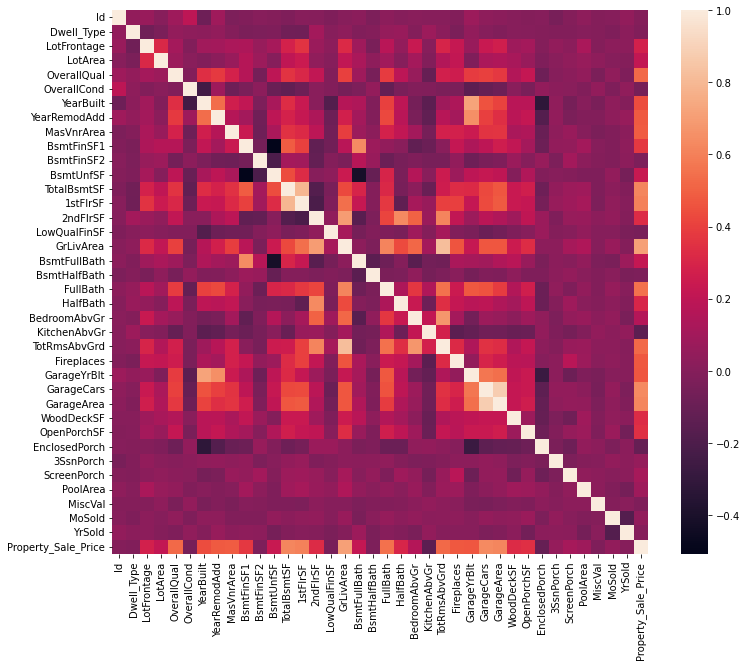

In [38]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr())

In [39]:
df.describe()

,Id,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
count,2073.000000,2073.000000,1753.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2059.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,1960.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,916.132176,60.556199,72.056475,10717.853353,6.233478,5.835022,1969.445731,1986.617463,101.875668,437.949349,49.219489,565.101302,1052.270140,1166.096961,344.745779,6.168355,1517.011095,0.429329,0.056440,1.571635,0.378678,2.874096,1.052581,6.540280,0.602026,1980.418367,1.775687,474.683068,94.168837,46.035697,21.029908,2.979257,14.552340,2.299083,39.736614,6.287506,2007.851905,180967.284129
std,493.014670,159.924810,27.987475,9215.982306,1.517115,1.360214,30.222647,20.432694,179.169217,448.051119,165.621465,449.730940,431.026436,376.975119,438.844748,49.553967,517.236428,0.522605,0.237015,0.545963,0.499873,0.816144,0.237901,1.629673,0.633931,24.158327,0.741976,212.284955,129.072113,64.768713,59.569928,26.817218,54.099626,37.411031,429.819512,2.690130,1.329705,78666.411112
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1906.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,519.000000,20.000000,60.000000,7620.000000,5.000000,5.000000,1950.000000,1970.000000,0.000000,0.000000,0.000000,208.000000,794.000000,894.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1963.000000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,932.000000,50.000000,70.000000,9492.000000,6.000000,5.000000,1971.000000,1995.000000,0.000000,381.000000,0.000000,466.000000,990.000000,1095.000000,0.000000,0.000000,1470.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1984.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163990.000000
75%,1302.000000,70.000000,83.000000,11601.000000,7.000000,7.000000,1999.000000,2004.000000,161.500000,708.000000,0.000000,804.000000,1291.000000,1391.000000,730.000000,0.000000,1792.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,576.000000,168.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1820.000000,7080.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2023.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2019.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Creating a copy of df

In [40]:
df_manipulated=df.copy(deep=True)
df_manipulated.drop(['Id'],axis=1,inplace=True)

# Null Check

In [41]:
df_manipulated.isnull().sum()

Dwell_Type                0
Zone_Class                0
LotFrontage             320
LotArea                   0
Road_Type                 0
Alley                  1944
Property_Shape            0
LandContour               0
Utilities                 0
LotConfig                 0
LandSlope                 0
Neighborhood              0
Condition1                0
Condition2                0
Dwelling_Type             0
HouseStyle                0
OverallQual               0
OverallCond               0
YearBuilt                 0
YearRemodAdd              0
RoofStyle                 0
RoofMatl                  0
Exterior1st               0
Exterior2nd               0
MasVnrType               14
MasVnrArea               14
ExterQual                 0
ExterCond                 0
Foundation                0
BsmtQual                 59
BsmtCond                 59
BsmtExposure             61
BsmtFinType1             59
BsmtFinSF1                0
BsmtFinType2             60
BsmtFinSF2          

# Dropping cols with too many null

In [42]:
df_manipulated.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','LotFrontage','MasVnrType','GarageType','GarageYrBlt','GarageFinish','GarageType'],axis=1,inplace=True)

# Numeric null values are replced with mean

In [43]:
df_manipulated.fillna(df_manipulated.mean(numeric_only=True),inplace=True)

# Before encoding a copy is created

In [44]:
df_encoded=df_manipulated.copy(deep=True)

# Encoding

In [45]:
for col in df_encoded.columns:
    if df_encoded[col].dtype=='object':
        df_encoded[col]=df_encoded[col].astype('category')
        df_encoded[col]=df_encoded[col].cat.codes
df_encoded.head()

,Dwell_Type,Zone_Class,LotArea,Road_Type,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,60,3,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,20,3,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,60,3,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,70,3,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,60,3,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,250000


In [46]:
df_model=df_encoded.copy(deep=True)

# Modelling and Score

In [47]:
X=df_model.drop('Property_Sale_Price',axis=1)
y=df_model.Property_Sale_Price
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [48]:
reg=linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [49]:
reg.score(X_test,y_test)

0.8977486511302323